In [4]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import plotly.express as px

from warnings import filterwarnings
filterwarnings("ignore")

In [5]:
stress = pd.read_csv("stress.csv")
stress.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [6]:
df = stress.copy()
df.columns=['snoring_rate', 'respiration_rate', 'body_temperature', 'limb_movement', 'blood_oxygen', \
             'eye_movement', 'sleeping_hours', 'heart_rate', 'stress_level']
df.head()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate,stress_level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [7]:
stress.isna().sum()

sr      0
rr      0
t       0
lm      0
bo      0
rem     0
sr.1    0
hr      0
sl      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   snoring_rate      630 non-null    float64
 1   respiration_rate  630 non-null    float64
 2   body_temperature  630 non-null    float64
 3   limb_movement     630 non-null    float64
 4   blood_oxygen      630 non-null    float64
 5   eye_movement      630 non-null    float64
 6   sleeping_hours    630 non-null    float64
 7   heart_rate        630 non-null    float64
 8   stress_level      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [9]:
df['stress_level'].unique()

array([3, 1, 0, 2, 4], dtype=int64)

In [10]:
df["stress_level"].value_counts()

3    126
1    126
0    126
2    126
4    126
Name: stress_level, dtype: int64

<AxesSubplot: xlabel='stress_level', ylabel='count'>

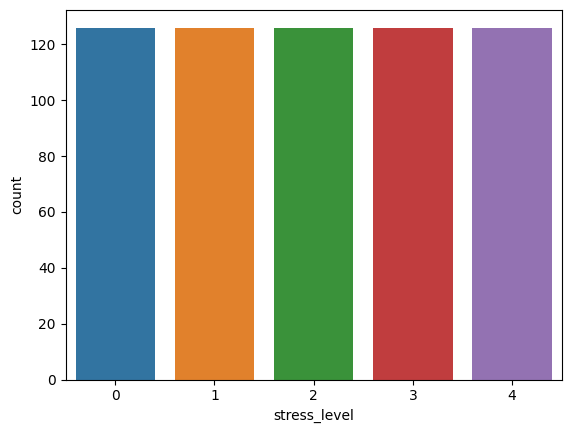

In [11]:
sbn.countplot(data = df, x = "stress_level")

In [12]:
count = df.groupby(by=["stress_level"]).size().reset_index(name="counts")
count

,stress_level,counts
0,0,126
1,1,126
2,2,126
3,3,126
4,4,126


In [13]:
px.bar(data_frame=count, x="stress_level", y="counts", color="stress_level", barmode="group")

In [14]:
df.groupby('stress_level').mean()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate
stress_level,,,,,,,,
0,47.5,17.0,97.5,6.0,96.0,70.0,8.0,52.5
1,55.0,19.0,95.0,9.0,93.5,82.5,6.0,57.5
2,70.0,21.0,93.0,11.0,91.0,90.0,3.5,62.5
3,87.5,24.0,91.0,14.5,89.0,97.5,1.0,70.0
4,98.0,28.0,87.5,18.0,85.0,102.5,0.0,80.0


In [15]:
df.groupby('stress_level').min()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate
stress_level,,,,,,,,
0,45.0,16.0,96.0,4.0,95.0,60.0,7.0,50.0
1,50.0,18.0,94.0,8.0,92.0,80.0,5.0,55.0
2,60.0,20.0,92.0,10.0,90.0,85.0,2.0,60.0
3,80.0,22.0,90.0,12.0,88.0,95.0,0.0,65.0
4,96.0,26.0,85.0,17.0,82.0,100.0,0.0,75.0


In [16]:
df.groupby('stress_level').max()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate
stress_level,,,,,,,,
0,50.0,18.0,99.0,8.0,97.0,80.0,9.0,55.0
1,60.0,20.0,96.0,10.0,95.0,85.0,7.0,60.0
2,80.0,22.0,94.0,12.0,92.0,95.0,5.0,65.0
3,95.0,26.0,92.0,17.0,90.0,100.0,2.0,75.0
4,100.0,30.0,90.0,19.0,88.0,105.0,0.0,85.0


In [17]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate,stress_level
snoring_rate,1.000000,0.976268,-0.902475,0.981078,-0.903140,0.950600,-0.920554,0.976268,0.975322
respiration_rate,0.976268,1.000000,-0.889237,0.991738,-0.889210,0.935572,-0.891855,1.000000,0.963516
body_temperature,-0.902475,-0.889237,1.000000,-0.896412,0.998108,-0.857299,0.954860,-0.889237,-0.962354
limb_movement,0.981078,0.991738,-0.896412,1.000000,-0.898527,0.964703,-0.901102,0.991738,0.971071
blood_oxygen,-0.903140,-0.889210,0.998108,-0.898527,1.000000,-0.862136,0.950189,-0.889210,-0.961092
eye_movement,0.950600,0.935572,-0.857299,0.964703,-0.862136,1.000000,-0.893952,0.935572,0.951988
sleeping_hours,-0.920554,-0.891855,0.954860,-0.901102,0.950189,-0.893952,1.000000,-0.891855,-0.973036
heart_rate,0.976268,1.000000,-0.889237,0.991738,-0.889210,0.935572,-0.891855,1.000000,0.963516
stress_level,0.975322,0.963516,-0.962354,0.971071,-0.961092,0.951988,-0.973036,0.963516,1.000000


In [18]:
figure = px.scatter(data_frame = df, x=df.heart_rate, y=df.limb_movement, color= 'stress_level')
figure.show()

In [19]:
cols = []
for col1 in df.columns:
    cols.append(col1)
    for col2 in df.columns:
        if col2 not in cols:
            figure = px.scatter(data_frame = df, x=col1, y=col2, color= 'stress_level')
            figure.show()

In [20]:
for col in df.columns:
    figure = px.scatter(data_frame = df, x=df.stress_level, y=col, color= 'stress_level')
    figure.show()

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = df.drop('stress_level', axis=1)
y = df['stress_level']

In [23]:
X.head()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12


In [24]:
y.head()

0    3
1    3
2    1
3    3
4    0
Name: stress_level, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 42)

### Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [27]:
lr.coef_ # agirliklari

array([ 0.00954695,  0.0173066 , -0.16384253, -0.07651018,  0.04707549,
        0.03193905, -0.11204437,  0.04326651])

In [28]:
X_test.iloc[34].values

array([ 97.184,  27.184,  86.48 ,  17.592,  83.776, 101.48 ,   0.   ,
        77.96 ])

In [29]:
index = 34
print("Correct level: ", y_test.values[index])

l = X_test.iloc[index].values.reshape(1, -1)
rounded = round(lr.predict(l)[0])  # en yakin sinifa yuvarla.
print("Prediced level: ",rounded) # sonuc tam sayi olmadigindan yuvarladim.

Correct level:  4
Prediced level:  4


In [30]:
me = [[97,23,87,15,83,101,0,77 ]]

rounded = round(lr.predict(me)[0])
print("Prediced level: ",rounded)

Prediced level:  4


In [31]:
#y_pred = lr.predict(X_test)

accuracy = lr.score(X_test,y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9998778720128053



Linear regresyon genellikle sürekli(sayısal) değişkenleri tahmin etmek için kullanılır. 

In [32]:
from sklearn.linear_model import LogisticRegression

### Logistic Regression

In [33]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [34]:
log.score(X_test,y_test) # bu proje icin en iyi model 

1.0

coef lineerde her sutun(kategoriye) bir agirlik veriyorken logistic her stres seviyesi icin farkli bir agirlik veriyor. bu da dogruluk oranini iyi anlamda etkiliyor.

In [35]:
log.coef_ 

array([[-9.16858637e-01, -2.09344736e-01,  9.11542084e-01,
        -2.39703960e-01,  9.01497872e-01, -9.07737826e-01,
         8.33639235e-01, -5.37931168e-01],
       [-6.31821466e-01, -6.81167858e-02,  1.97403979e-01,
        -4.41576655e-02,  4.77661574e-01, -7.56643929e-03,
         6.36060668e-01, -1.65245584e-01],
       [ 6.34750641e-02,  2.07566284e-05,  1.01986397e-01,
        -2.68264389e-02, -1.54178338e-01,  1.82299674e-01,
        -9.08207332e-03,  1.02211380e-02],
       [ 5.90227217e-01, -2.50748865e-02, -3.26142031e-01,
         6.33444506e-02, -2.44255619e-01,  3.06243178e-01,
        -1.14936502e+00, -5.08811597e-02],
       [ 8.94977822e-01,  3.02515652e-01, -8.84790428e-01,
         2.47343613e-01, -9.80725488e-01,  4.26761413e-01,
        -3.11252809e-01,  7.43836775e-01]])

In [36]:
X_test.iloc[34].values

array([ 97.184,  27.184,  86.48 ,  17.592,  83.776, 101.48 ,   0.   ,
        77.96 ])

In [37]:
index = 37
print("Correct level: ", y_test.values[index])

l = X_test.iloc[index].values.reshape(1, -1)
pred=log.predict(l)
print("Prediced level: ",pred[0])

Correct level:  2
Prediced level:  2


In [38]:
me = [[97,23,87,15,83,101,0,77 ]]

pred=log.predict(me)
print("Prediced level: ",pred)

Prediced level:  [4]


### SVM ( Support Vector Machines )

Verilerin birbirinde çizgiler ile net bir şekilde ayrıldığı grafiklerde DESTEK vektör makinesi ilen çizilen çizgiler sınıflandırma problemlerinde kullanılıyor

In [39]:
from sklearn.svm import SVC
svc = SVC()

In [40]:
svc.fit(X_train,y_train)

SVC()

In [41]:
svc.score(X_test,y_test)

0.9810126582278481

### Karar Ağacı


In [42]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [43]:
dtc.fit(X_train,y_train)
dtc.score(X_test,y_test)

0.9746835443037974

In [44]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [45]:
dtr.fit(X_train,y_train)
dtr.score(X_test,y_test)

0.9904265632573922

### confusion matrix

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,log.predict(X_test))
cm

array([[34,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0],
       [ 0,  0, 33,  0,  0],
       [ 0,  0,  0, 31,  0],
       [ 0,  0,  0,  0, 29]], dtype=int64)

Text(50.722222222222214, 0.5, 'predicted\xa0label')

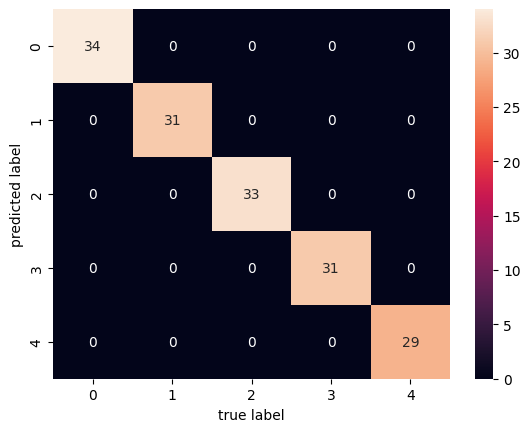

In [47]:
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.xlabel("true label")
plt.ylabel('predicted label')

In [56]:
best_results= df['stress_level'] == 0
df[best_results]

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate,stress_level
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
6,47.00,16.800,97.200,5.600,95.800,68.00,7.800,52.00,0
7,50.00,18.000,99.000,8.000,97.000,80.00,9.000,55.00,0
8,45.28,16.112,96.168,4.224,95.112,61.12,7.112,50.28,0
12,48.60,17.440,98.160,6.880,96.440,74.40,8.440,53.60,0
...,...,...,...,...,...,...,...,...,...
597,45.64,16.256,96.384,4.512,95.256,62.56,7.256,50.64,0
604,48.32,17.328,97.992,6.656,96.328,73.28,8.328,53.32,0
618,48.40,17.360,98.040,6.720,96.360,73.60,8.360,53.40,0
619,46.08,16.432,96.648,4.864,95.432,64.32,7.432,51.08,0


In [58]:
worst_results= df['stress_level'] == 4
df[worst_results]

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate,stress_level
13,96.288,26.288,85.36,17.144,82.432,100.36,0.0,75.72,4
31,96.256,26.256,85.32,17.128,82.384,100.32,0.0,75.64,4
33,99.904,29.904,89.88,18.952,87.856,104.88,0.0,84.76,4
37,98.528,28.528,88.16,18.264,85.792,103.16,0.0,81.32,4
39,98.720,28.720,88.40,18.360,86.080,103.40,0.0,81.80,4
...,...,...,...,...,...,...,...,...,...
606,97.760,27.760,87.20,17.880,84.640,102.20,0.0,79.40,4
611,98.592,28.592,88.24,18.296,85.888,103.24,0.0,81.48,4
620,97.024,27.024,86.28,17.512,83.536,101.28,0.0,77.56,4
623,98.144,28.144,87.68,18.072,85.216,102.68,0.0,80.36,4


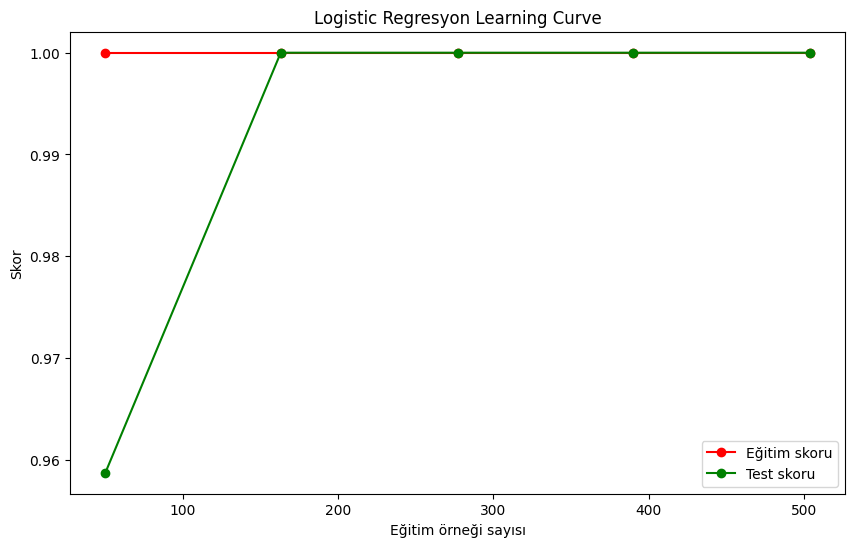

In [59]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(), X, y, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Eğitim skoru")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test skoru")
plt.xlabel("Eğitim örneği sayısı")
plt.ylabel("Skor")
plt.legend(loc="best")
plt.title("Logistic Regresyon Learning Curve")
plt.show()